### SMS Classifier

To develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

In [2]:
# Import data manipulation and visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import text processing and machine learning libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
# Import NLTK libraries for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [5]:
# Load and preprocess the dataset
data = pd.read_csv('spam.csv', encoding='latin1')  # Load dataset
data = data.iloc[:, :2]  # Retain only the first two columns
data.columns = ['label', 'message']  # Rename columns for clarity

In [6]:
# Encode labels as numbers (ham: 0, spam: 1)
label_encoder = LabelEncoder()
data['label_num'] = label_encoder.fit_transform(data['label'])

In [7]:
# Remove duplicate messages
data.drop_duplicates(subset='message', keep='first', inplace=True)

In [8]:
# Download and configure NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Load stopwords
stemmer = PorterStemmer()  # Initialize stemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Function to clean text data
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and stem words
    return ' '.join(words)

In [10]:
# Apply preprocessing to the message column
data['cleaned_message'] = data['message'].apply(preprocess_text)

In [11]:
# Initialize vectorizers
count_vectorizer = CountVectorizer()  # Count Vectorizer
tfidf_vectorizer = TfidfVectorizer()  # TFIDF Vectorizer

In [12]:
# Transform text data into feature vectors
X_count = count_vectorizer.fit_transform(data['cleaned_message'])  # Count Vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(data['cleaned_message'])  # TFIDF Vectorizer
y = data['label_num'].values  # Target variable

In [13]:
# Split the data into training and testing sets
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=101)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=101)

In [14]:
# Train and evaluate a Multinomial Naive Bayes classifier using Count Vectorizer
model_count = MultinomialNB()  # Initialize model
model_count.fit(X_train_count, y_train)  # Train model
y_pred_count = model_count.predict(X_test_count)  # Predict on test data

In [15]:
# Calculate performance metrics for Count Vectorizer
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average='weighted')
recall_count = recall_score(y_test, y_pred_count, average='weighted')
f1_count = f1_score(y_test, y_pred_count, average='weighted')

In [16]:
# Print performance metrics for Count Vectorizer
print("Count Vectorizer Results")
print("Accuracy:", accuracy_count)
print("Precision:", precision_count)
print("Recall:", recall_count)
print("F1 Score:", f1_count)

Count Vectorizer Results
Accuracy: 0.9777562862669246
Precision: 0.9781709636161691
Recall: 0.9777562862669246
F1 Score: 0.9779188232099039


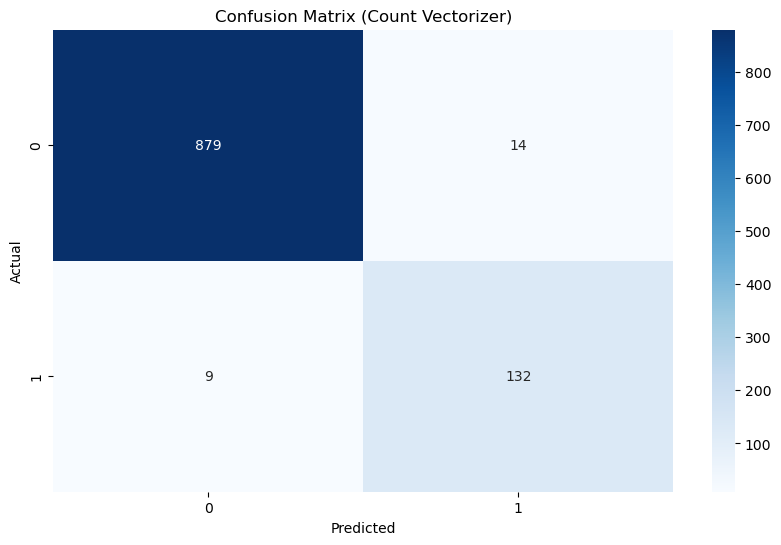

In [17]:
# Generate and plot the confusion matrix for Count Vectorizer
cm_count = confusion_matrix(y_test, y_pred_count)  # Confusion matrix
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues')  # Plot heatmap
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Count Vectorizer)')  # Plot title
plt.show()  # Display plot

In [18]:
# Train and evaluate a Multinomial Naive Bayes classifier using TFIDF Vectorizer
model_tfidf = MultinomialNB()  # Initialize model
model_tfidf.fit(X_train_tfidf, y_train)  # Train model
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)  # Predict on test data

In [19]:
# Calculate performance metrics for TFIDF Vectorizer
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

In [20]:
# Print performance metrics for TFIDF Vectorizer
print("TFIDF Vectorizer Results")
print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1 Score:", f1_tfidf)

TFIDF Vectorizer Results
Accuracy: 0.9506769825918762
Precision: 0.9533416795069337
Recall: 0.9506769825918762
F1 Score: 0.9459169029120036


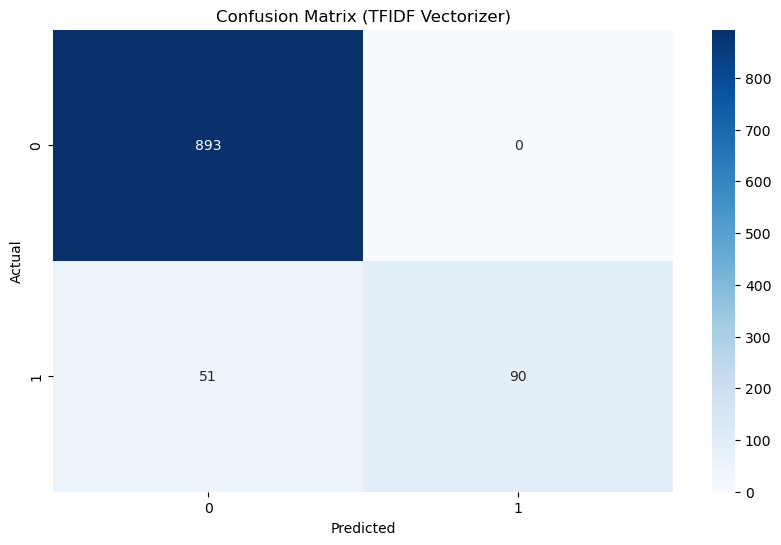

In [21]:
# Generate and plot the confusion matrix for TFIDF Vectorizer
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)  # Confusion matrix
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')  # Plot heatmap
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (TFIDF Vectorizer)')  # Plot title
plt.show()  # Display plot